In [191]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')


In [192]:
Train_df = pd.read_csv(r"C:\Users\admin\Desktop\Python basis\New folder\bigdatamart_Train.csv")
Test_df = pd.read_csv(r"C:\Users\admin\Desktop\Python basis\New folder\bigdatamart_Test.csv")                     

In [193]:
Train_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


This is a supervised machine learning problem with a target label as:Item_Outlet_Sales

In [194]:
Test_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


There is a missing value in Outlet_Size

In [195]:
print('Train_df:',Train_df.shape)
print('Test_df:',Test_df.shape)

Train_df: (8523, 12)
Test_df: (5681, 11)


In [ ]:
In Train 8523 Rows and 12 column
In Train 5681 Rows and 11 column

In [196]:
Train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,7060.0,12.857645,4.643456,4.555,8.773750,12.600000,16.850000,21.350000
Item_Visibility,8523.0,0.066132,0.051598,0.000,0.026989,0.053931,0.094585,0.328391
Item_MRP,8523.0,140.992782,62.275067,31.290,93.826500,143.012800,185.643700,266.888400
Outlet_Establishment_Year,8523.0,1997.831867,8.371760,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


In [197]:
Train_df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
There is a missing value in Item_Weight  and Outlet_Size.rest data have no any mising value

In [198]:
Test_df.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [ ]:
There is a missing value in Item_Weight  and Outlet_Size.rest data have no any mising value

In [199]:
Train_df['source']= 'train'
Test_df['source']= 'test'

df = pd.concat([Train_df,Test_df],ignore_index=True)



In [200]:
df.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [201]:
df.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
14199,FDB58,10.5,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN,test
14200,FDD47,7.6,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN,test
14201,NCO17,10.0,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,test
14202,FDJ26,15.3,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN,test
14203,FDU37,9.5,Regular,0.104720,Canned,79.7960,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,test


In [202]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [ ]:
There is a missing value in Item_Weight  and Outlet_Size and Item_Outlet_Sales.rest data have no any mising value

In [203]:
df.shape

(14204, 13)

In [ ]:
In my data set 14204 rows and 13 columns

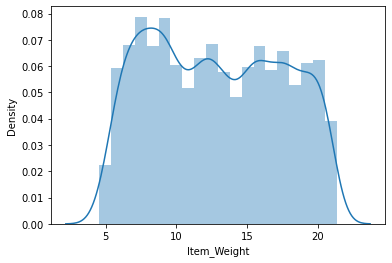

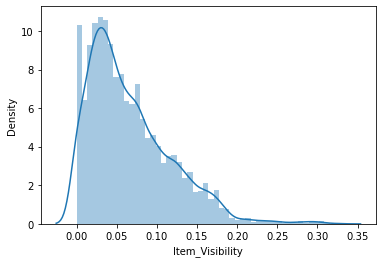

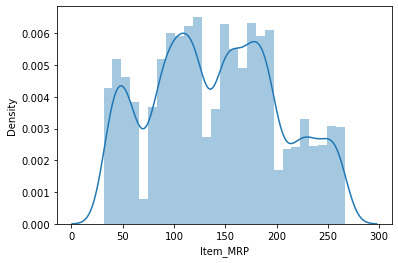

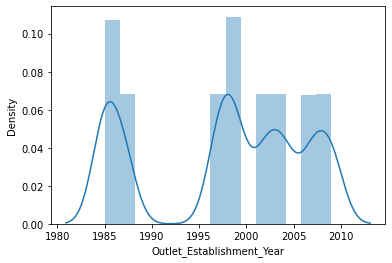

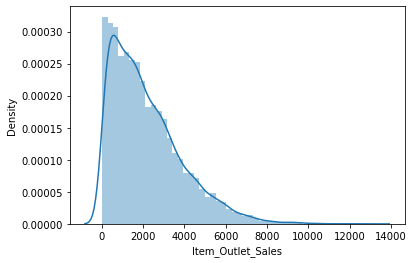

In [204]:
for i in Train_df.describe().columns:
    sns.distplot(Train_df[i].dropna())
    plt.show()
    

In [ ]:
In Above Graph Item_outlet_sales And Item_Visibility is normal distribution.Rest are not Normal Distribution

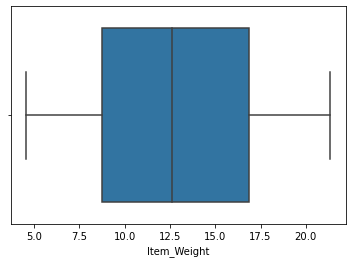

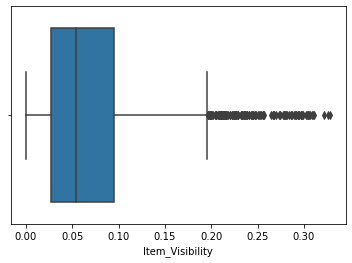

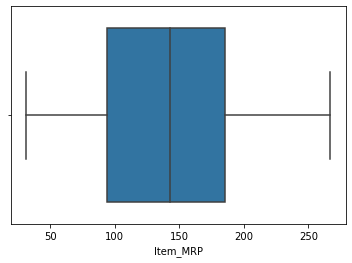

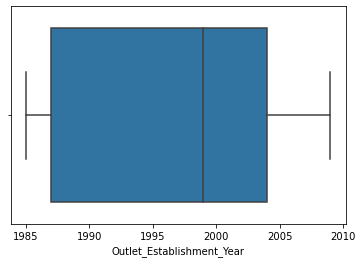

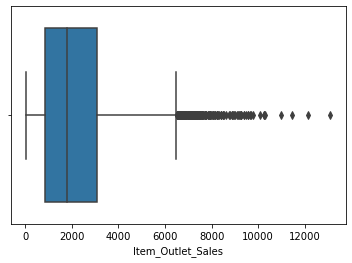

In [205]:
for i in Train_df.describe().columns:
    sns.boxplot(Train_df[i].dropna())
    plt.show()

In [ ]:
Some Skewness in Item_Outlet_sales and item visibility

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Dairy'),
  Text(1, 0, 'Soft Drinks'),
  Text(2, 0, 'Meat'),
  Text(3, 0, 'Fruits and Vegetables'),
  Text(4, 0, 'Household'),
  Text(5, 0, 'Baking Goods'),
  Text(6, 0, 'Snack Foods'),
  Text(7, 0, 'Frozen Foods'),
  Text(8, 0, 'Breakfast'),
  Text(9, 0, 'Health and Hygiene'),
  Text(10, 0, 'Hard Drinks'),
  Text(11, 0, 'Canned'),
  Text(12, 0, 'Breads'),
  Text(13, 0, 'Starchy Foods'),
  Text(14, 0, 'Others'),
  Text(15, 0, 'Seafood')])

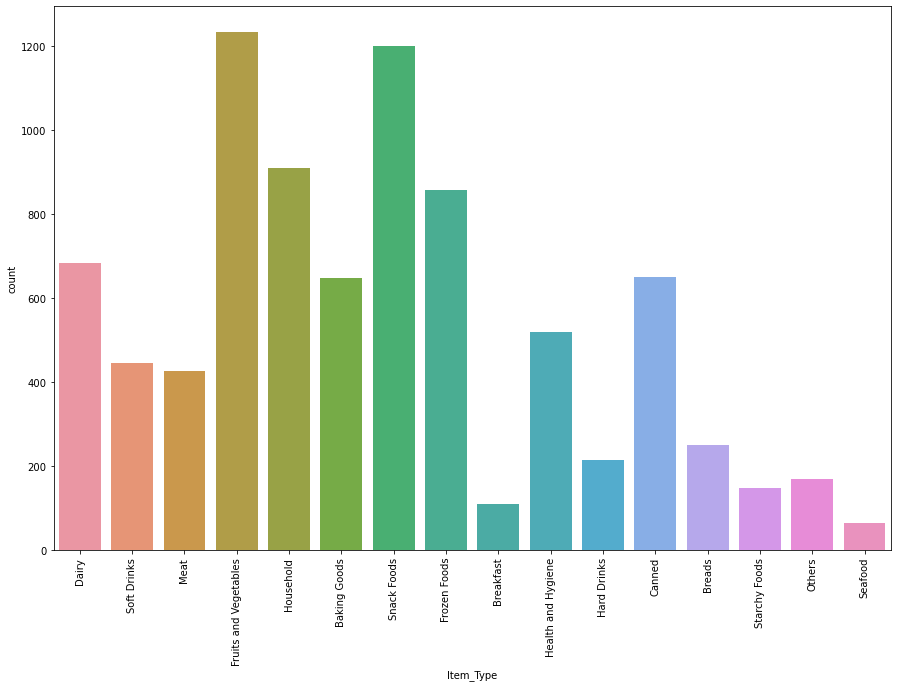

In [206]:
plt.figure(figsize=(15,10))
sns.countplot(Train_df.Item_Type)
plt.xticks(rotation=90)


In [207]:
Train_df.Item_Type.value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [ ]:
Fruits and Vegetables Are very Large number Avaiable and Snack Foods Also

### Distribution of the Outlet_Size

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

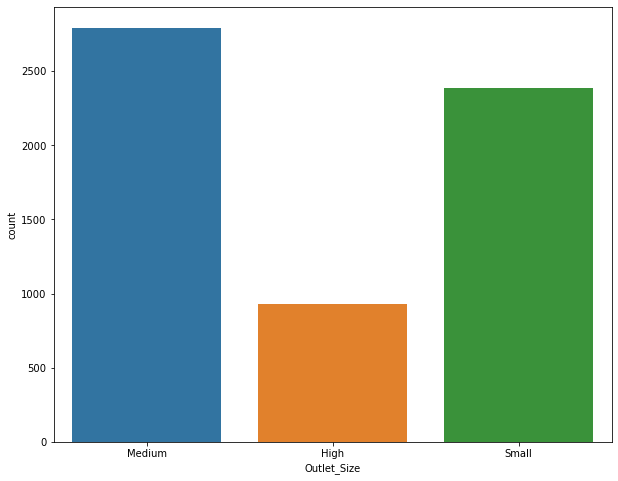

In [208]:
plt.figure(figsize=(10,8))
sns.countplot(Train_df.Outlet_Size)

In [ ]:
Above Graph we have devide 3 categ. High,Medium and small

In [209]:
Train_df.Outlet_Size.value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [ ]:
Medium size count is very large compare to small and high

### Distribution of the Outlet_Location_Type

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

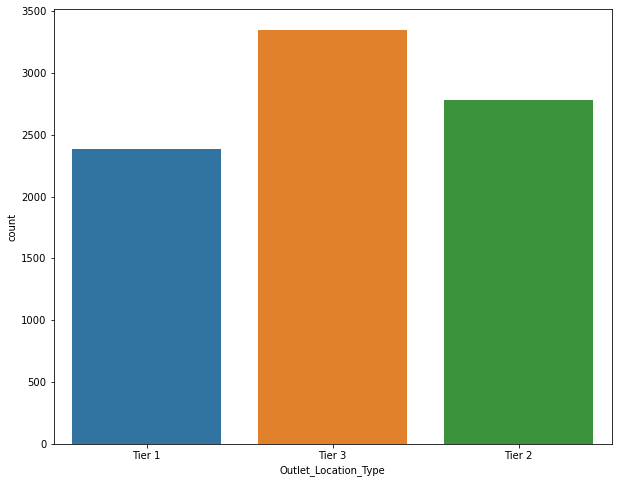

In [210]:
plt.figure(figsize=(10,8))
sns.countplot(Train_df.Outlet_Location_Type)

In [211]:
Train_df.Outlet_Location_Type.value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

### Distribution of the Outlet_Type

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Supermarket Type1'),
  Text(1, 0, 'Supermarket Type2'),
  Text(2, 0, 'Grocery Store'),
  Text(3, 0, 'Supermarket Type3')])

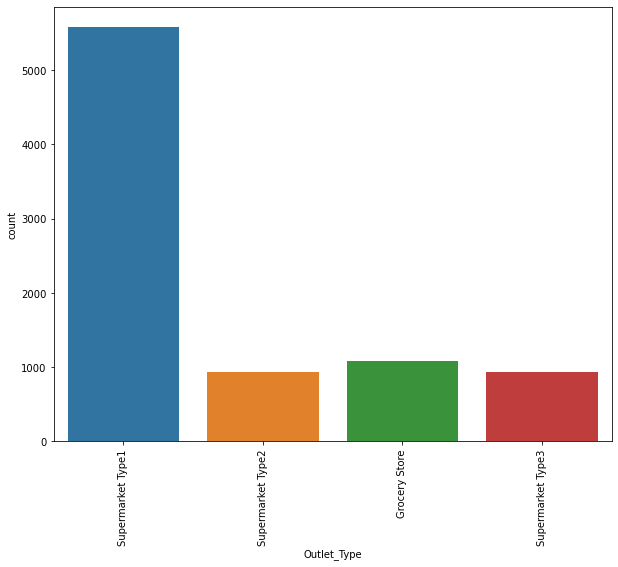

In [212]:
plt.figure(figsize=(10,8))
sns.countplot(Train_df.Outlet_Type)
plt.xticks(rotation=90)

In [213]:
Train_df.Outlet_Type.value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

<AxesSubplot:title={'center':'Item_Weight and Itam_Outlet_Sales Analysis'}, xlabel='Item_Weight', ylabel='Item_Outlet_Sales'>

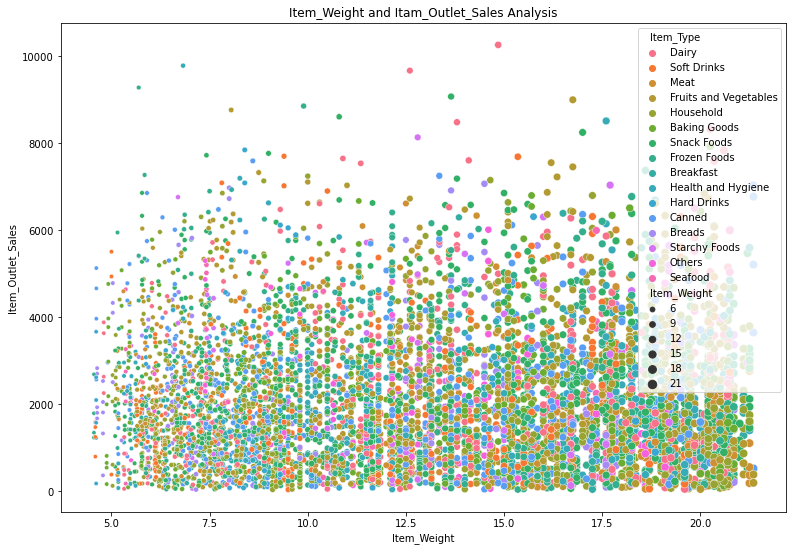

In [214]:
plt.figure(figsize=(13,9))
plt.xlabel("Item_Weight")
plt.ylabel("Item_Outlet_Sales")
plt.title("Item_Weight and Itam_Outlet_Sales Analysis")

sns.scatterplot(x="Item_Weight",y="Item_Outlet_Sales",hue='Item_Type',size='Item_Weight',data = Train_df)

<AxesSubplot:title={'center':'Item_Visibility and Itam_Outlet_Sales Analysis'}, xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>

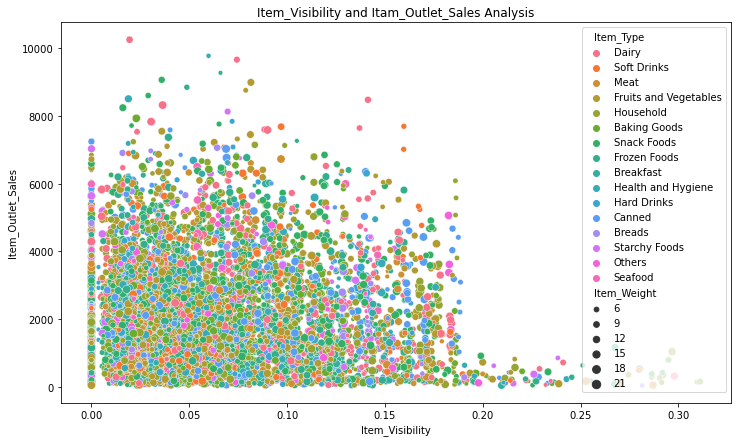

In [215]:
plt.figure(figsize=(12,7))
plt.xlabel("Item_Visibility")
plt.ylabel("Item_Outlet_Sales")
plt.title("Item_Visibility and Itam_Outlet_Sales Analysis")

sns.scatterplot(x="Item_Visibility",y="Item_Outlet_Sales",hue='Item_Type',size='Item_Weight',data = Train_df)

In [ ]:
In above graph Compare with Item_visibility vs Item_Outlet_Sales

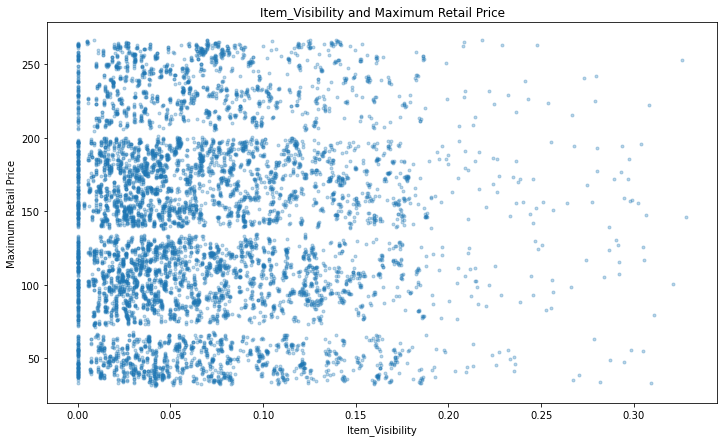

In [216]:
plt.figure(figsize=(12,7))
plt.xlabel("Item_Visibility")
plt.ylabel("Maximum Retail Price")
plt.title("Item_Visibility and Maximum Retail Price")

plt.plot(Train_df.Item_Visibility,Train_df.Item_MRP,".",alpha=0.3)

In [ ]:
In above graph Compare with Item_visibility vs Maximum Retail Price

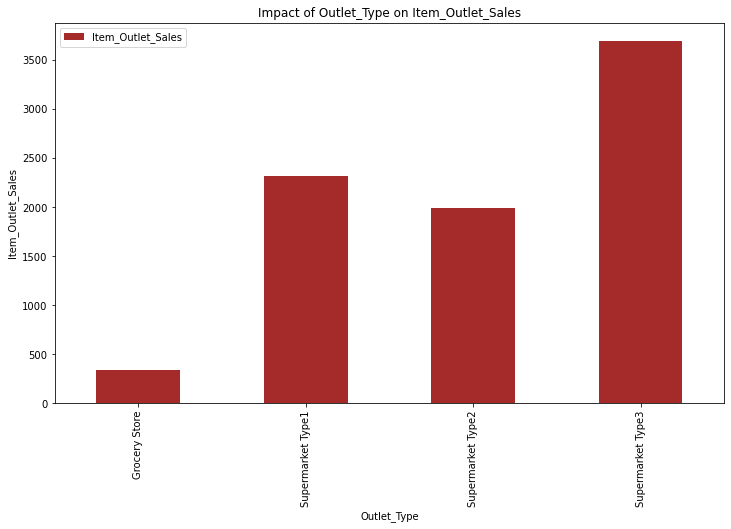

In [217]:
Outlet_Type_pivot = \
Train_df.pivot_table(index='Outlet_Type',values='Item_Outlet_Sales')

Outlet_Type_pivot.plot(kind='bar',color='brown',figsize=(12,7))
plt.xlabel('Outlet_Type')
plt.ylabel('Item_Outlet_Sales')
plt.title('Impact of Outlet_Type on Item_Outlet_Sales')
plt.show()

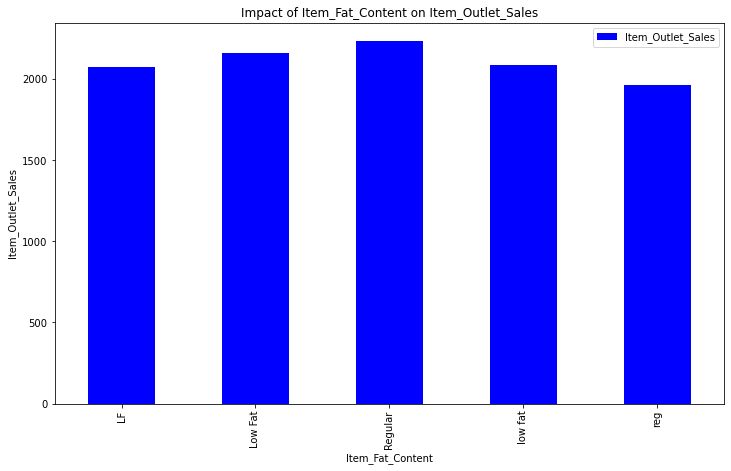

In [218]:
Item_Fat_Content_pivot = \
Train_df.pivot_table(index='Item_Fat_Content',values='Item_Outlet_Sales')

Item_Fat_Content_pivot.plot(kind='bar',color='blue',figsize=(12,7))
plt.xlabel('Item_Fat_Content')
plt.ylabel('Item_Outlet_Sales')
plt.title('Impact of Item_Fat_Content on Item_Outlet_Sales')
plt.show()

In [219]:
df['Item_Fat_Content'].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [220]:
df['Item_Fat_Content']= df['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','Low fat':'Low Fat'})

In [221]:
df['Item_Fat_Content'].value_counts()

Low Fat    9007
Regular    5019
low fat     178
Name: Item_Fat_Content, dtype: int64

In [222]:
Train_df ['Item_Fat_Content'] = Train_df['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','Low fat':'Low Fat'})

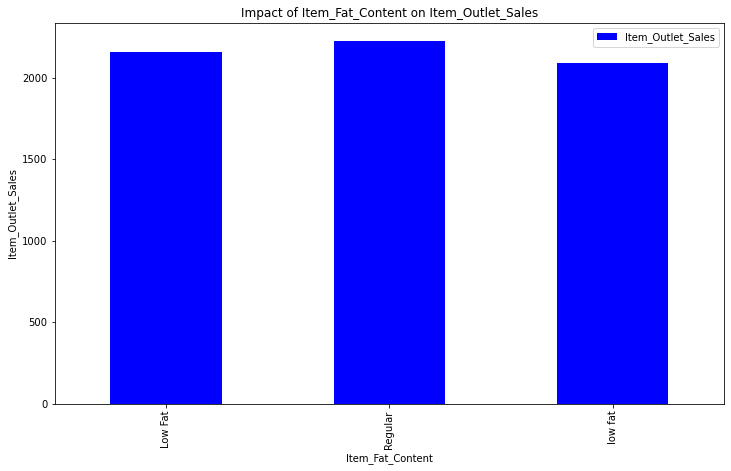

In [223]:
Item_Fat_Content_pivot = \
Train_df.pivot_table(index='Item_Fat_Content',values='Item_Outlet_Sales')

Item_Fat_Content_pivot.plot(kind='bar',color='blue',figsize=(12,7))
plt.xlabel('Item_Fat_Content')
plt.ylabel('Item_Outlet_Sales')
plt.title('Impact of Item_Fat_Content on Item_Outlet_Sales')
plt.show()

In [224]:
Train_df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


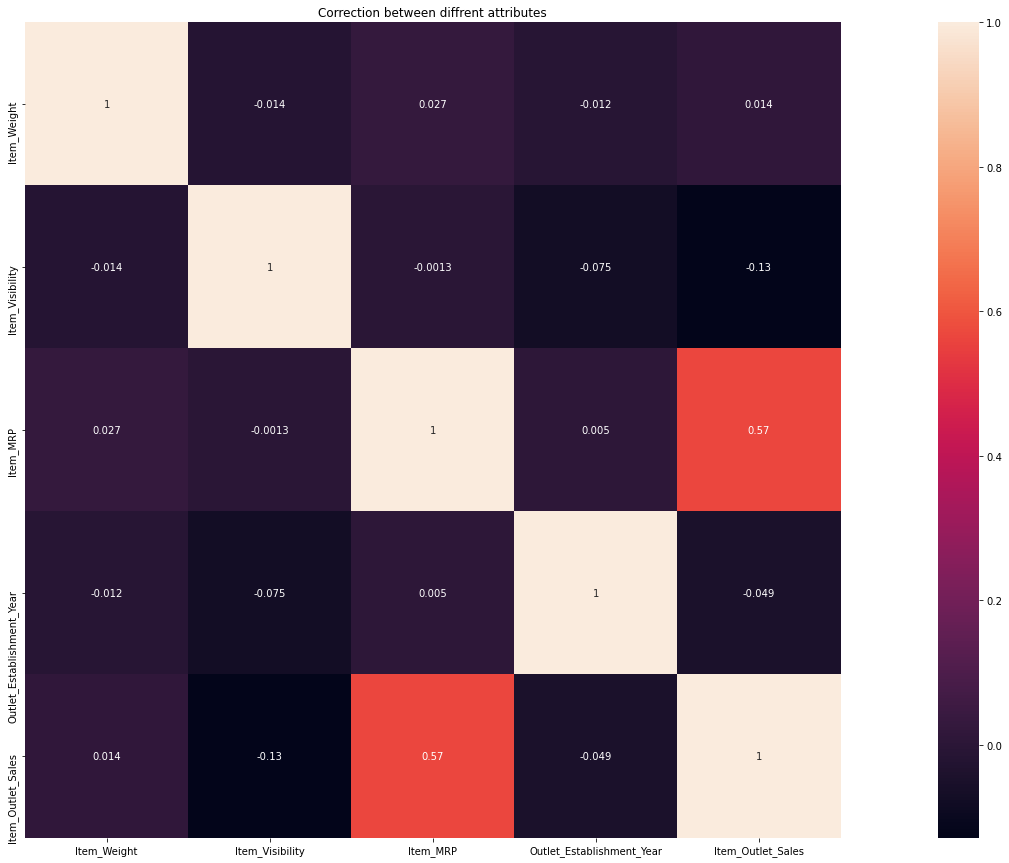

In [225]:
plt.figure(figsize=(35,15))
sns.heatmap(Train_df.corr(),vmax=1,square=True,annot=True)
plt.title('Correction between diffrent attributes')
plt.show()

In [ ]:
Item_weight vs item_outlets_sales are very low relationship

### Feature Engineering and Transformation

#### Treating the Missing Values

In [226]:
df['Item_Weight'].mean()

12.792854228644991

In [227]:
df['Item_Weight'].fillna(df['Item_Weight'].mean(),inplace=True)

#### Outlet_Size

In [228]:
df['Outlet_Size'].value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [229]:
df['Outlet_Size'].fillna('Medium',inplace=True)

In [230]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [231]:
Test_df.shape

(5681, 12)

In [232]:
df.shape

(14204, 13)

#### Item Visibility

In [233]:
df[df['Item_Visibility']==0]['Item_Visibility'].count()

879

In [234]:
df['Item_Visibility'].fillna(df['Item_Visibility'].median(),inplace=True)

#### Outlet Years

In [235]:
df['Outlet_Establishment_Year'].value_counts()

1985    2439
1987    1553
1999    1550
1997    1550
2004    1550
2002    1548
2009    1546
2007    1543
1998     925
Name: Outlet_Establishment_Year, dtype: int64

In [236]:
df['Outlet_years'] = 2009 - df['Outlet_Establishment_Year']
df['Outlet_years'].describe()

count    14204.000000
mean        11.169319
std          8.371664
min          0.000000
25%          5.000000
50%         10.000000
75%         22.000000
max         24.000000
Name: Outlet_years, dtype: float64

### Item type

In [237]:
df['Item_Type'].value_counts()

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

In [238]:
df['Item_Identifier'].value_counts()

FDY40    10
DRJ47    10
FDH04    10
DRM37    10
FDQ37    10
         ..
FDS22     7
FDM52     7
FDI46     7
FDO33     7
NCW54     7
Name: Item_Identifier, Length: 1559, dtype: int64

Analysis we will be creating 3 categories as pointed out insted of the already 16 categories

In [240]:
# Changing only the first 2 characters (i,e categoey ID)
df['New_Item_type'] = df['Item_Identifier'].apply(lambda x:x[0:2])

In [241]:
# Rename them to more intuitive categories:
df['New_Item_type'] = df['New_Item_type'].map({'FD':'Food','NC':'Non-Consumable','DR':'Drink'})

df['New_Item_type'].value_counts()


Food              10201
Non-Consumable     2686
Drink              1317
Name: New_Item_type, dtype: int64

### If a product is non-consumable then why associate a fat-content to them? we will get rid of this

In [242]:
# Mark non-consumables as seprated category in low_fat:
df.loc[df['New_Item_type']=='Non-Consumable','Item_Fat_Content']= 'Non-Edible'
df['Item_Fat_Content'].value_counts()

Low Fat       6365
Regular       5019
Non-Edible    2686
low fat        134
Name: Item_Fat_Content, dtype: int64

Under normal circumstamce,if a product is more visible then it's likely it will be getting higher sales.we can based on
that hypothesis and   importance given to a product in a given store accordingly to the mean of significance given to the same 
product in all other store

In [243]:
item_visib_avg = df.pivot_table(values='Item_Visibility',index='Item_Identifier')

In [244]:
item_visib_avg

,Item_Visibility
Item_Identifier,
DRA12,0.034938
DRA24,0.045646
DRA59,0.133384
DRB01,0.079736
DRB13,0.006799
...,...
NCZ30,0.027302
NCZ41,0.056396
NCZ42,0.011015


In [245]:
function = lambda x:x['Item_Visibility']/item_visib_avg['Item_Visibility'][item_visib_avg.index==x['Item_Identifier']][0]
df['Item_visib_avg'] = df.apply(function,axis=1).astype(float)

In [246]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Outlet_years,New_Item_type,Item_visib_avg
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,10,Food,0.931078
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,0,Drink,0.933420
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train,10,Food,0.960069
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,train,11,Food,0.000000
4,NCD19,8.93,Non-Edible,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train,22,Non-Consumable,0.000000


#### Dealing with our Categorical Variables

In [247]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

#New variable for outlet

df['Outlet'] = label.fit_transform(df['Outlet_Identifier'])
varib = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','New_Item_type','Outlet_Type','Outlet']

for i in varib:
    df[i] = label.fit_transform(df[i])

In [248]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Outlet_years,New_Item_type,Item_visib_avg,Outlet
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,1,0,1,3735.1380,train,10,1,0.931078,9
1,DRC01,5.92,2,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,2,443.4228,train,0,0,0.933420,3
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,1,0,1,2097.2700,train,10,1,0.960069,9
3,FDX07,19.20,2,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,1,2,0,732.3800,train,11,1,0.000000,0
4,NCD19,8.93,1,0.000000,Household,53.8614,OUT013,1987,0,2,1,994.7052,train,22,2,0.000000,1


In [249]:
# Dummy Variables:
df = pd.get_dummies(df,columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','New_Item_type','Outlet'])
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
source                        object
Outlet_years                   int64
Item_visib_avg               float64
Item_Fat_Content_0             uint8
Item_Fat_Content_1             uint8
Item_Fat_Content_2             uint8
Item_Fat_Content_3             uint8
Outlet_Location_Type_0         uint8
Outlet_Location_Type_1         uint8
Outlet_Location_Type_2         uint8
Outlet_Size_0                  uint8
Outlet_Size_1                  uint8
Outlet_Size_2                  uint8
Outlet_Type_0                  uint8
Outlet_Type_1                  uint8
Outlet_Type_2                  uint8
Outlet_Type_3                  uint8
New_Item_type_0                uint8
New_Item_type_1                uint8
N

In [250]:
df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,source,Outlet_years,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,9.30,0.016047,Dairy,249.8092,OUT049,1999,3735.1380,train,10,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,5.92,0.019278,Soft Drinks,48.2692,OUT018,2009,443.4228,train,0,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,17.50,0.016760,Meat,141.6180,OUT049,1999,2097.2700,train,10,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,19.20,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,732.3800,train,11,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,8.93,0.000000,Household,53.8614,OUT013,1987,994.7052,train,22,...,0,1,0,0,0,0,0,0,0,0


### Model Building

In [251]:
df.drop(['Item_Type','Outlet_Establishment_Year'],axis=1,inplace=True)

In [252]:
train = df.loc[df['source']== 'train']
test = df.loc[df['source']== 'test']

In [253]:
train.drop(['source'],axis=1,inplace=True)

In [254]:
test.drop(['Item_Outlet_Sales','source'],axis=1,inplace=True)

In [255]:
x_train = train.drop(['Item_Outlet_Sales','Item_Identifier','Outlet_Identifier'],axis=1)
y_train= train['Item_Outlet_Sales']
x_test = test.drop(['Item_Identifier','Outlet_Identifier'],axis=1).copy()

### Linear Regression

In [257]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [258]:
lr.pred = lr.predict(x_test)

In [260]:
lr_accuracy = round(lr.score(x_train,y_train)*100)

In [261]:
lr_accuracy

56

### DecisionTreeRegressor

In [265]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(max_depth=15,min_samples_leaf=100)

tree.fit(x_train,y_train)
tree_pred = tree.predict(x_test)

In [270]:
tree_pred

array([1649.299786  , 1412.15620504,  584.75776477, ..., 1827.83284545,
       3692.81910244, 1211.249992  ])

In [268]:
tree_accuracy = round(tree.score(x_train,y_train)*100)
tree_accuracy

62

### RandomForestRegressor

In [274]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=400,max_depth=6,min_samples_leaf=100,n_jobs=4)
rf.fit(x_train,y_train)
rf_pred = rf.predict(x_test)

rf_accuracy = round(rf.score(x_train,y_train)*100)
rf_accuracy

61

### XGBoost Regressor

In [281]:
!pip install xgboost

In [284]:
from xgboost import XGBRegressor

In [285]:
model = XGBRegressor(n_estimators=1000,learning_rate=0.05)
model.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [286]:
y_pred = model.predict(x_test)
y_pred


array([1524.4015 , 1300.5444 ,  705.60535, ..., 2043.4926 , 4399.631  ,
       1540.9117 ], dtype=float32)

In [287]:
model.score(x_train,y_train)*100

88.82296642739156

In [ ]:
Finally my Model accuracy is 88%